In [5]:
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline



(303, 497, 3)
(303, 497)


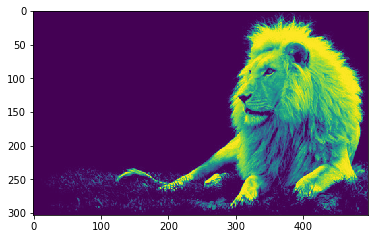

In [35]:
lion_arr = np.array(Image.open('../Lion.png'))
print (lion_arr.shape)
lion_arr = lion_arr[:, :, 0]
print (lion_arr.shape)
plt.imshow(lion_arr)

(305, 499)


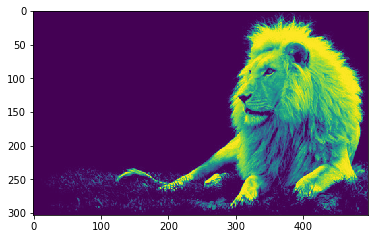

In [46]:
padded_arr = np.pad(lion_arr, (1, 1), 'constant')
print (padded_arr.shape)
kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])  # Identity kernel
# kernel = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])  # Edge detection
# kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  # Edge detection
# kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])  # Edge detection
# kernel = np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])  # Gaussian blur
output_array = np.zeros(lion_arr.shape)

for i in range(padded_arr.shape[0] - 2):
    for j in range(padded_arr.shape[1] - 2):
        temp_arr = padded_arr[i: i + 3, j: j + 3]
        output_array[i, j] = np.sum(temp_arr * kernel)

plt.imshow(output_array)

In [62]:
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value > 255:
        return 255
    return value


def convolve_2d_kernel(inp_img, kernel, squash_pixel=True):
    padded_arr = np.pad(inp_img, (1, 1), 'constant')
    
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    transformed_arr = np.zeros(inp_img.shape)
    
    for i in range(padded_arr.shape[0] - kernel_width + 1):
        for j in range(padded_arr.shape[1] - kernel_height + 1):
            temp_arr = padded_arr[i: i + kernel_width, j: j+kernel_height]
            if squash_pixel:
                transformed_arr[i, j] = squash_pixel_value(np.sum(temp_arr * kernel))
            else:
                transformed_arr[i, j] = np.sum(temp_arr * kernel)

    return transformed_arr

In [67]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

lion_transf_edge1 = convolve_2d_kernel(lion_arr, edge_kernel_1, squash_pixel = True)
lion_transf_edge2 = convolve_2d_kernel(lion_arr, edge_kernel_2, squash_pixel = True)
lion_transf_edge3 = convolve_2d_kernel(lion_arr, edge_kernel_3, squash_pixel = True)

(-0.5, 496.5, 302.5, -0.5)

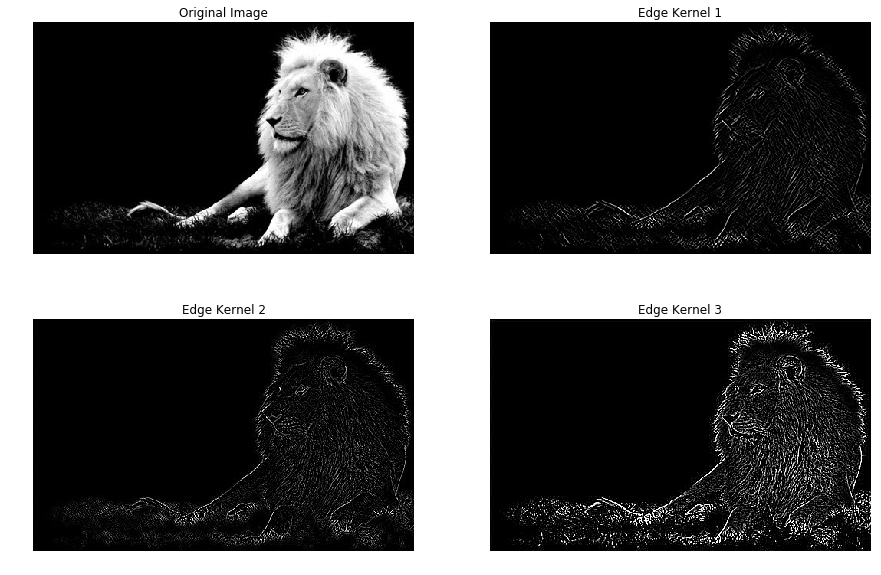

In [68]:
f, ax_array = plt.subplots(2, 2)
f.set_figheight(10)
f.set_figwidth(15)
ax_array[0, 0].imshow(lion_arr, cmap = plt.get_cmap('gray'))
ax_array[0, 0].set_title('Original Image')
ax_array[0, 0].axis('off')
ax_array[0, 1].imshow(lion_transf_edge1, cmap = plt.get_cmap('gray'))
ax_array[0, 1].set_title('Edge Kernel 1')
ax_array[0, 1].axis('off')
ax_array[1, 0].imshow(lion_transf_edge2, cmap = plt.get_cmap('gray'))
ax_array[1, 0].set_title('Edge Kernel 2')
ax_array[1, 0].axis('off')
ax_array[1, 1].imshow(lion_transf_edge3, cmap = plt.get_cmap('gray'))
ax_array[1, 1].set_title('Edge Kernel 3')
ax_array[1, 1].axis('off')

In [69]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

unsharp_kernel = np.array([[1, 4, 6, 4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, -476, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1, 4, 6, 4, 1]]) / -256

lion_transf_sharpen = convolve_2d_kernel(lion_arr, kernel = sharpen_kernel, squash_pixel = True)
lion_transf_unsharp = convolve_2d_kernel(lion_arr, kernel = unsharp_kernel, squash_pixel = True)

(-0.5, 496.5, 302.5, -0.5)

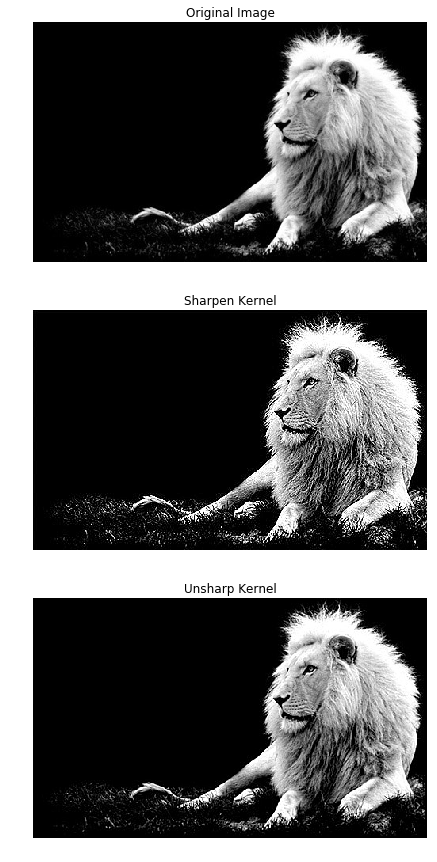

In [70]:
f, ax_array = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(12)
ax_array[0].imshow(lion_arr, cmap = plt.get_cmap('gray'))
ax_array[0].set_title('Original Image')
ax_array[0].axis('off')
ax_array[1].imshow(lion_transf_sharpen, cmap = plt.get_cmap('gray'))
ax_array[1].set_title('Sharpen Kernel')
ax_array[1].axis('off')
ax_array[2].imshow(lion_transf_unsharp, cmap = plt.get_cmap('gray'))
ax_array[2].set_title('Unsharp Kernel')
ax_array[2].axis('off')

In [71]:
blur_box_kernel = np.ones((3, 3)) / 9
blur_gaussian_kernel = np.array([[1,2,1],
                                 [2,4,2],
                                 [1,2,1]]) / 16

lion_transf_blur_box = convolve_2d_kernel(lion_arr, kernel = blur_box_kernel, squash_pixel = True)
lion_transf_blur_gaussian = convolve_2d_kernel(lion_arr, kernel = blur_gaussian_kernel, squash_pixel = True)

(-0.5, 496.5, 302.5, -0.5)

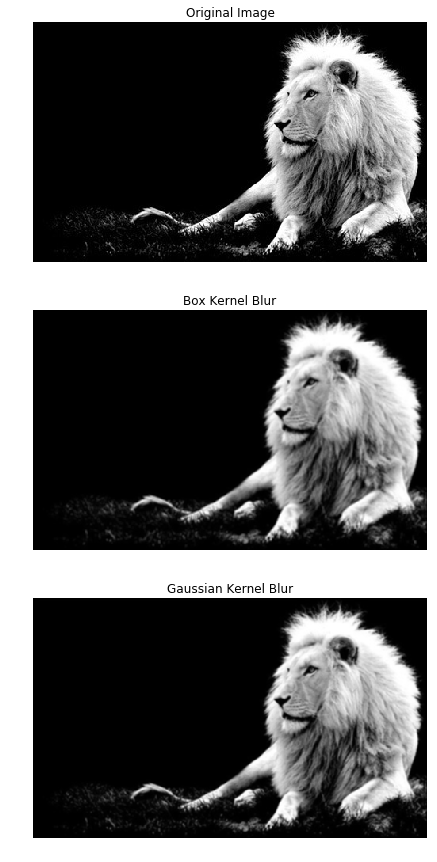

In [72]:
f, ax_array = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(12)

ax_array[0].imshow(lion_arr, cmap = plt.get_cmap('gray'))
ax_array[0].set_title('Original Image')
ax_array[0].axis('off')
ax_array[1].imshow(lion_transf_blur_box, cmap = plt.get_cmap('gray'))
ax_array[1].set_title('Box Kernel Blur')
ax_array[1].axis('off')
ax_array[2].imshow(lion_transf_blur_gaussian, cmap = plt.get_cmap('gray'))
ax_array[2].set_title('Gaussian Kernel Blur')
ax_array[2].axis('off')

## Generating data

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

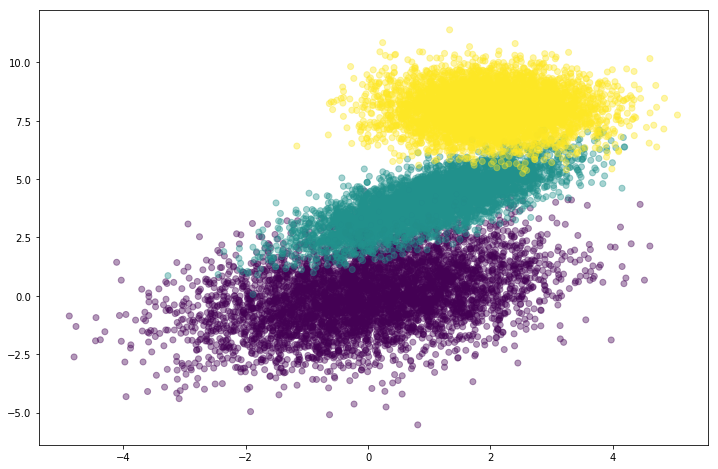

In [88]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[2, .75],[.75, 2]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
x3 = np.random.multivariate_normal([2, 8], [[0, .75],[.75, 0]], num_observations)

simulated_separableish_features = np.vstack((x1, x2, x3)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations), np.ones(num_observations) + 1))

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1], c = simulated_labels, alpha = .4)

In [14]:
import numpy as np
dW = np.zeros((5, 3))
print(dW.shape)

(5, 3)


In [15]:
X = np.ones((1, 5))
X[0] = 1
X[0, 2] = 3
print (X.shape)

(1, 5)


In [16]:
print (dW)


[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [17]:
print(X)

[[ 1.  1.  3.  1.  1.]]


In [20]:
dW[:, 2]

array([ 1.,  1.,  3.,  1.,  1.])

In [19]:
print(dW)

[[ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  3.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


In [21]:
print (X.T)

[[ 1.]
 [ 1.]
 [ 3.]
 [ 1.]
 [ 1.]]
